# Introducing Scikit-Learn

This exercise generally follows section [5.02 of the PDSH](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html).

## Why not the `iris` dataset?

For a number of reasons, I have switched out the dataset for a different one. The main reason is that the `iris` dataset that is used in the text, and indeed in **many** tutorials and texts, is ethically challenged. As outlined in the Armchair Ecology blog post *[It's time to retire the iris dataset](https://armchairecology.blog/iris-dataset/)*, [here](https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5), and many other sources, the dataset, while collected by Edgar Anderson, was first published by R. A. Fisher in 1936 in the *Annals of Eugenics*; you can read the article [here](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) if you wish. To quote from the [Armchair Ecology blog](https://armchairecology.blog/iris-dataset/):

 >...for you see, `iris` was collected and first published with the express intent to advance the science of eugenics, and parading it around in 2020 is an unacceptable endorsement of a repulsive (but still very much alive) way to subsume science under ideology. For this reason, `iris` should not be appearing in teaching material with such ubiquity, unless it is to remind students that white supremacy has always tried to use quantitative methods to push its agenda, and that quantitative sciences have a foundation in providing arguments to scientific racism and classism.
> 
> By using this dataset in 2020, we are sending a very strong message. Maybe we do not care about the role of science in creating and re-inforcing inequalities and structures of oppression. Maybe we are at peace with the fact that a lot of early quantitative techniques in the biological sciences have been designed to support eugenics and grant it legitimacy, as phrenology did before. Maybe we are eager to pardon the racism of pioneers of the field if their contributions are important enough. Maybe we just don’t care about the social consequences of our science. In any case, just as much as one does not publish in Annals of Eugenics by accident, the decision to keep using this dataset is an endorsement, albeit an implicit one, of being able to draw a straight line from mainstream academic science to white supremacy. Every time we use `iris` as foundational in data science education, we are re-drawing this straight line, over and over again. Whether we intend to do so matters little, if at all.

## The `breast_cancer` dataset

The dataset for this example is another one built into `sklearn` and comes with this metadata:

>This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2
>
>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
>
>Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, “Decision Tree Construction Via Linear Programming.” Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.
>
>The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: “Robust Linear Programming Discrimination of Two Linearly Inseparable Sets”, Optimization Methods and Software 1, 1992, 23-34].


## Data as tables

Using our `breast_cancer` dataset, let's follow the example from [5.02 of the PDSH](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html). 

Because the data are stored and accessed a little differently, there are a few differences. The `sklearn` documentation for [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) shows that we can load the data into a dataframe (to follow along with the text) using `as_frame=True`, but that the return (what is put into the `breast_cancer` variable below) is a dictionary object. So, to access the dataframe portion of that we use `breast_cancer.frame.head()`.

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)
breast_cancer.frame.head()

type(breast_cancer)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Our data consist of 569 rows, one for each patient. We have 30 columns of baseline data: age, sex, bmi, bp, and blood serum values s1-6. Lastly we have the measure of disease progression one-year later, labeled: target; 0=malignant, 1=benign.

The 30 columns are our **features**, our goal is to make a **model** to predict the **target**.

As in the text, we can plot the data to explore it:

In [2]:
%matplotlib inline

import seaborn as sns; sns.set()

# Plot only some of the columns since there are so many...takes a long time to do all
sns.pairplot(data=breast_cancer.frame,
             x_vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry'],
             y_vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry'],
             hue='target', size=1.5)

NameError: name 'breast_cancer' is not defined

The next bit of PDSH goes into getting the format expected by `sklearn`, and most other toolkits: a dataframe of features, one row per sample and a vector of labels/outputs one cell per sample. This image from the text does a good job illustrating this:

![Diagram showing the feature matrix and target vector for sklearn](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

While we could follow the text and convert our `breast_cancer.frame` as needed, it is easier to use another handy method of `sklearn` and import the dataset formatted as needed by re-importing the data, this time, setting `return_X_y=True`

In [1]:
X_breat_cancer, y_breast_cancer = load_breast_cancer(return_X_y=True)   
X_breast_cancer
X_breast_cancer.shape
y_breast_cancer.shape

NameError: name 'load_breast_cancer' is not defined

## Linear regression with `sklearn`: 1. quick and dirty

Let's follow the text and use some made-up data to do a quick linear regression with `sklearn`. After that, we'll come back and add a little more of the theory we started to look at in lecture, and then come back to the breast cancer data.

Remember our generic AI cycle diagram from lecture:

![Diagram of a generic AI cycle](images/AI-cycle.png)

Make some x,y values for the examples...note the in this case, we have *one* feature, $x$, and our target, $y$.

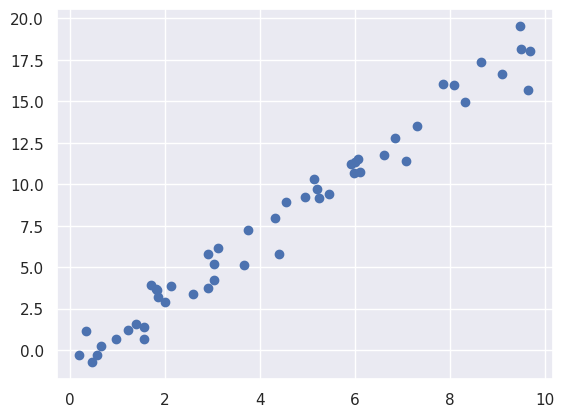

In [16]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

Following the steps in the text, we need to:

### 1. Choose a class of model

In [3]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters

We haven't really talked about parameters vs hyperparameters.Our model will have two parameters: the slope and y-intercept. Those are the things the model is estimating. Other aspects of how we build and improve the model are hyperparameters...things like, the loss function, the optimizer, and some more nitty-gritty details as noted in the text (normalization, regularization, etc.). Let's instantiate a model and show its (admittedly simple details):

In [4]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### 3. Arrange data into features matrix and target vector

Right now, $x$ is 'just' an array (look at `x.shape` and `type(x)`). We need it to be a matrix--in this case it will only have one column, but everything is setup to take a matrix. We'll also take this opportunity to name it with the conventional capital-$X$.

In [5]:
type(x)
x.shape
X = x[:,np.newaxis]
type(X)
X.shape

NameError: name 'x' is not defined

### 4. Fit the model to our data

In [6]:
model.fit(X, y)

NameError: name 'X' is not defined

That was fast! Now we can look at the parameters of the model, which in this case are stored in `model.coef_` (the slope) and `model.intercept_` (the y-intercept).

In [28]:
model.coef_

array([1.9776566])

In [29]:
model.intercept_

np.float64(-0.9033107255311146)

Given that we created the $y$ values with the formula `y = 2 * x - 1 + rng.randn(50)`, we expected the `model.coef_` to be 2 and the `model.intercept_` to be -1...not too bad!

### 5. Predict labels for unknown data

So far, we've got a model based on *training data*. Usually, what we want to do is use this model to predict the response (the $y$'s) for new samples.

We can create some new data and reshape it into the required matrix:

In [7]:
xfit = np.linspace(-1, 11)
Xfit - xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# Visilize the results
  # Scatter plot of our training data
  # Our linear model

plt.scatter(x, y)
plt.plot(xfit, yfit);

NameError: name 'np' is not defined

## Linear regression with `sklearn`: 2. Going back to our theory...

A lot happened here with what is a handful of lines of code. `sklearn` is great in that it makes all of this easy. But while we have a relatively simple model, I want to go back and look a the details a bit more in-depth.

We will stick with some made up data, almost exactly the same as above, but let's make 100 points, and split the data into 80 for training and 20 for testing.

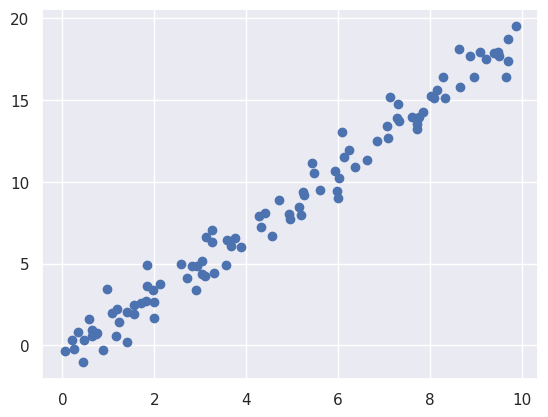

In [31]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(100)
y = 2 * x - 1 + rng.randn(100)
plt.scatter(x, y)


(1.0, 20.0)

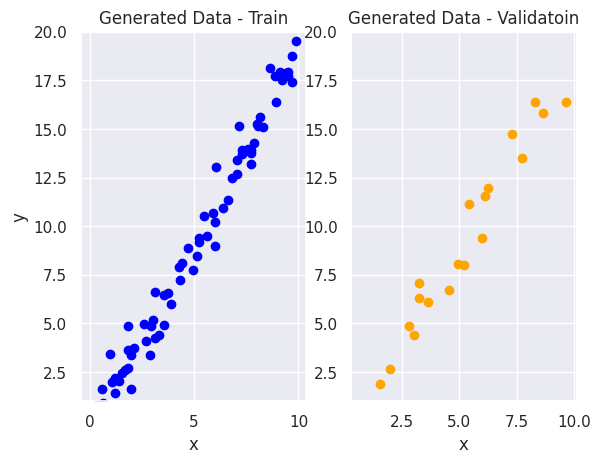

In [32]:
# Shuffles the indices to split train and validation datasets
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Plot the test and train datasets
fig, ax = plt.subplots(1,2)

ax[0].scatter(x_train,y_train, color='blue')
ax[0].set_title('Generated Data - Train')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim(1,20) # Set y axis range so both plots are the same.

ax[1].scatter(x_val,y_val, color='orange')
ax[1].set_title('Generated Data - Validatoin')
ax[1].set_xlabel('x')
ax[1].set_ylim(1,20)

Ok, so now we have our data, let's step through the process as outlined above, but with a bit more detail...

### 1. Choose a class of model

We are going to do a linear model again, but now, we are going to define our parameters manually. Here's out linear model:

$$ y = a + bx + \epsilon $$

Where $a$ is our y-intercept and $b$ is the slope. Again, with how we generated our data, we expect $a=1$ and $b=2$, but let's see...

So we need two parameters, $a$ and $b$. What should we set these to? How about we randomly guess as a start?

In [33]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)
print(a,b)

[0.49671415] [-0.1382643]


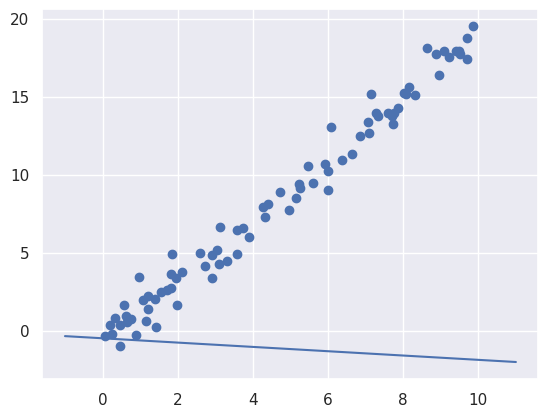

In [34]:
# Let's write a function to plot our model predictions
def check_model(a, b, x, y):
    xfit = np.linspace(-1,11)
    yfit =  b * xfit - a

    # Visilize the results
    plt.scatter(x,y) # Scatter plot of our training data
    plt.plot(xfit,yfit) # Our linear model
    
check_model(a,b, x_train, y_train)

### 2. Choose model hyperparameters

In [35]:
# Sets hyper-parameters 
# learning rate
lr = 1e-2

# Defines number of epochs
n_epochs = 1000



### 3. Arrange data into features matrix and target vector

In this case, because of the way we are going to make the model, we are ok leaving the x_train as an array.

In [36]:
x_train.shape

(80,)

### 4. Fit the model to our data

Fitting, or training, the model has several steps that we'll break out here.

#### Model training step 1: Compute the model's predicted output

Using the current model parameters, what output do we get? We call these estimates $\hat{y}$, or y-hat. 

In [37]:
yhat = b * x_train + a

#### Model training step 2: Compute the loss

Compare the predicted values to the known values and calculate a loss. We'll use mean squared error as our loss function that has the formula:

$$ MSE = \frac{1}{N}\sum_{i=1}^N ( y_i - \hat{y_i} )^2 $$

In [38]:
 # The part in parentheses
 #Square the error, and get the mean
    # This is the mean squared error
error = (y_train - yhat)
mse = (error ** 2).mean()

#### Model training step 3: Compute the gradient

Now we need to use our optimization tools to figure out how to update the model parameters. I'm not going to derive this here, but there are many place, one of which is Daniel Goody's post [here](https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e) if you want to get into the calculus that get's us here. 

The main thing to remember is that for each of our parameters, we are looking at the slope of the loss function based on where we are on the loss surface. Based on that slope, we can determine which way to update the parameter (increase it or decrease it) and by how much to change it.

In [39]:
# Calculate the gradients for our two parameters, a and b.

a_grad = -2 * error.mean()
b_grad = -2 * (x_train * error).mean()

#### Model training step 4: Update the parameters

Now that we know how to update the model parameters, we can update them. We'll use the learning rate hyperparameter to limit how much we update the parameters so that we don't overshoot when we make updates. 

[0.66522348] [1.03714158]


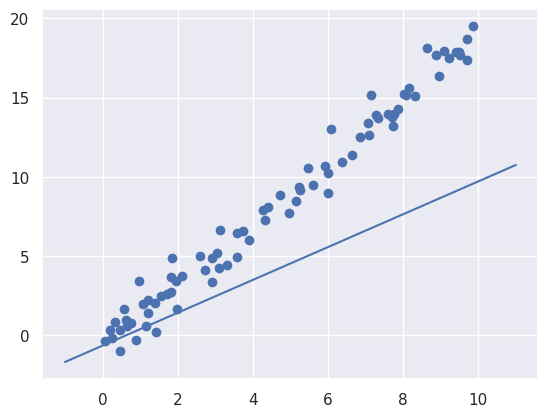

In [40]:
a = a - lr * a_grad
b = b - lr * b_grad

print(a,b)
check_model(a,b,x_train,y_train)

That's about it! We've gone through **one epoch** of learning! Our parameters, $a$ and $b$, have been updated, and hopefully our model is better at predicting our response. But machine learning is iterative...our model is still fairly bad...

#### Repeat the model fitting steps

No problem! Let's run through the process a bunch (`n_epochs = 1000`) of times...

In [41]:
for epoch in range(n_epochs):
    # Step 1: Computes our model's predicted output
    yhat = a + b * x_train
    
    # Step 2: Compue loss
    error = (y_train - yhat)
    loss = (error ** 2).mean()
    
    # Step 3: Compute gradients
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Step 4: Update parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
    if epoch % 50 == 0: # Print a,b and graph every 50 epochs
        print(f'Epoch: {epoch}; a={a},b={b}')
        

Epoch: 0; a=[0.72169786],b=[1.47268092]
Epoch: 50; a=[0.35996824],b=[1.78806854]
Epoch: 100; a=[0.06357556],b=[1.83297303]
Epoch: 150; a=[-0.15586869],b=[1.86621959]
Epoch: 200; a=[-0.31834159],b=[1.89083478]
Epoch: 250; a=[-0.43863385],b=[1.90905947]
Epoch: 300; a=[-0.52769625],b=[1.92255273]
Epoch: 350; a=[-0.59363658],b=[1.93254291]
Epoch: 400; a=[-0.64245771],b=[1.93993948]
Epoch: 450; a=[-0.67860407],b=[1.94541577]
Epoch: 500; a=[-0.70536624],b=[1.94947033]
Epoch: 550; a=[-0.72518051],b=[1.95247226]
Epoch: 600; a=[-0.73985067],b=[1.95469484]
Epoch: 650; a=[-0.75071221],b=[1.9563404]
Epoch: 700; a=[-0.75875392],b=[1.95755875]
Epoch: 750; a=[-0.76470787],b=[1.95846079]
Epoch: 800; a=[-0.76911607],b=[1.95912865]
Epoch: 850; a=[-0.77237983],b=[1.95962312]
Epoch: 900; a=[-0.77479627],b=[1.95998922]
Epoch: 950; a=[-0.77658536],b=[1.96026027]


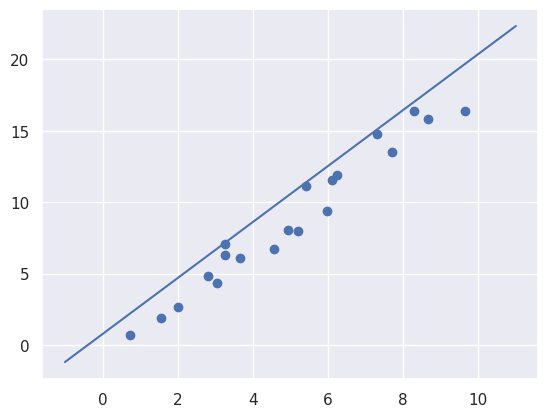

In [42]:
# Now we can check out model performance with the validation data

check_model(a,b, x_val, y_val)

## Finally...back to the breast cancer data!

Now, rather than a continuous variable for regression, we have a binary variable for classification. We can pickup following the text... 

### Supervised learning example: Breast cancer classification

Two quick notes here:
1. The text uses `from sklearn.cross_validation import train_test_split`...that won't work because recent versions of `sklearn` moved `train_test_split` to `model_selection`.
1. This is common in AI coding! Programming packages change fast and tutorials and example code break quickly. Learning how to deal with that is part of the fun and equally important 😅! 

In [43]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_breast_cancer, y_breast_cancer,
                                                random_state=1)

NameError: name 'X_breast_cancer' is not defined

In [45]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)              # 4. predict on new data

                        # 2. instantiate model
                        # 3. fit model to data
                        # 4. predict on new data

NameError: name 'Xtrain' is not defined

With a few lines of code, we have a model than can predict breast cancer occurrence with an accuracy of 94%! That's quite amazing! (It's also fairly easy data an we kind of saw that with the pairplots above...)

## Unsupervised learning example: Breast cancer dimensionality

Continuing with the text, let's try dimensionality reduction, in this case, using principle component analysis (PCA).


In [8]:
from sklearn.decomposition import PCA  # 1. Choose the model class
                       
model = PCA(n_components=2)     # 2. Instantiate the model with hyperparameters
model.fit(X_breast_cancer)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_breast_cancer_)                       # 4. Transform the data to two dimensions

NameError: name 'X_breast_cancer' is not defined

In [ ]:
breast_cancer.frame['PCA1'] = X_2D[:, 0]
breast_cancer.frame['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='target', data=breast_cancer.frame, fit_reg=False);

We could go on following the text, though I'm not sure clustering is that relevant in this case.

Let's explore the famous digits dataset...

## Application: Exploring the Hand-written Digits

This dataset is a subset of the famous AI/ML dataset MNIST which we may revisit later in the semester. Here's the metadata:
> The data set contains images of hand-written digits: 10 classes where each class refers to a digit.
>
> Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.
>
>For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.


### Loading and visualizing the data


In [ ]:
from sklearn.datasets import load_digits


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

#### Prepare the data

### Unsupervised learning: Dimensionality reduction

You can read more in the text, but I'm going to skip over the details of making the graph below...mostly a way of visualizing our 64-dimensional data in 2-dimensions.

Then we use a classification algorithm, Gaussian naive Bayes, on the dataset.

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
# Split the data into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# Fit the Gaissian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

# Get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
# See where our model makes mistakes
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# See some examples of correct and incorrect classifications
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')